In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### importing data

In [7]:
first_df = pd.read_excel('../data_scraping/samsung_huawei_oppo.xlsx')
second_df = pd.read_excel('../data_scraping/vivo_realme.xlsx')

In [8]:
df = pd.concat([first_df,second_df])
df.head()

,name,brand,front_camera,back_camera,screen_size,RAM,Memory,Battery,URL,price
0,samsung galaxy a24 4g,samsung,"13 MP, f/2.2, (wide)",50,\n ...,6 GB,"128GB 6GB RAM, 128GB 8GB RAM",Li-Po 5000 mAh,https://mob4me.com/samsung-galaxy-a24-4g,6767.0
1,samsung galaxy a14,samsung,"13 MP, f/2.0, (wide)",50,\n ...,6 GB,"64GB 4GB RAM, 128GB 4GB RAM, 128GB 6GB RAM",Li-Po 5000 mAh,https://mob4me.com/samsung-galaxy-a14,5250.0
2,samsung galaxy a34,samsung,"13 MP, f/2.2, (wide), 1/3.1"", 1.12µm",48,\n ...,6 GB,"128GB 6GB RAM, 128GB 8GB RAM, 256GB 8GB RAM",Li-Po 5000 mAh,https://mob4me.com/samsung-galaxy-a34,13299.0
3,samsung galaxy a54,samsung,"32 MP, f/2.2, 26mm (wide), 1/2.8"", 0.8µm",50,\n ...,6 GB,"128GB 6GB RAM, 128GB 8GB RAM, 256GB 8GB RAM",Li-Po 5000 mAh,https://mob4me.com/samsung-galaxy-a54,16999.0
4,samsung galaxy a04e,samsung,"5 MP, f/2.2",13,\n ...,3 GB,"32GB 3GB RAM, 64GB 3GB RAM",Li-Po 5000 mAh,https://mob4me.com/samsung-galaxy-a04e,3990.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 0 to 88
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          516 non-null    object 
 1   brand         516 non-null    object 
 2   front_camera  516 non-null    object 
 3   back_camera   516 non-null    object 
 4   screen_size   516 non-null    object 
 5   RAM           516 non-null    object 
 6   Memory        516 non-null    object 
 7   Battery       516 non-null    object 
 8   URL           516 non-null    object 
 9   price         90 non-null     float64
dtypes: float64(1), object(9)
memory usage: 44.3+ KB


## data preprocessing

In [21]:
df = df[df['price']>0]

In [33]:
df.screen_size = df.screen_size.apply(lambda x:x.replace('\n','').strip())
df.head()

,name,brand,front_camera,back_camera,screen_size,RAM,Memory,Battery,URL,price
0,samsung galaxy a24 4g,samsung,"13 MP, f/2.2, (wide)",50,6.5 بوصة,6 GB,"128GB 6GB RAM, 128GB 8GB RAM",Li-Po 5000 mAh,https://mob4me.com/samsung-galaxy-a24-4g,6767.0
1,samsung galaxy a14,samsung,"13 MP, f/2.0, (wide)",50,6.6 بوصة,6 GB,"64GB 4GB RAM, 128GB 4GB RAM, 128GB 6GB RAM",Li-Po 5000 mAh,https://mob4me.com/samsung-galaxy-a14,5250.0
2,samsung galaxy a34,samsung,"13 MP, f/2.2, (wide), 1/3.1"", 1.12µm",48,6.6 بوصة,6 GB,"128GB 6GB RAM, 128GB 8GB RAM, 256GB 8GB RAM",Li-Po 5000 mAh,https://mob4me.com/samsung-galaxy-a34,13299.0
3,samsung galaxy a54,samsung,"32 MP, f/2.2, 26mm (wide), 1/2.8"", 0.8µm",50,6.4 بوصة,6 GB,"128GB 6GB RAM, 128GB 8GB RAM, 256GB 8GB RAM",Li-Po 5000 mAh,https://mob4me.com/samsung-galaxy-a54,16999.0
4,samsung galaxy a04e,samsung,"5 MP, f/2.2",13,6.5 بوصة,3 GB,"32GB 3GB RAM, 64GB 3GB RAM",Li-Po 5000 mAh,https://mob4me.com/samsung-galaxy-a04e,3990.0


In [34]:
df.screen_size = df.screen_size.apply(lambda x:x.replace('بوصة','')).astype(floatt)
df.head()

,name,brand,front_camera,back_camera,screen_size,RAM,Memory,Battery,URL,price
0,samsung galaxy a24 4g,samsung,"13 MP, f/2.2, (wide)",50,6.5,6 GB,"128GB 6GB RAM, 128GB 8GB RAM",Li-Po 5000 mAh,https://mob4me.com/samsung-galaxy-a24-4g,6767.0
1,samsung galaxy a14,samsung,"13 MP, f/2.0, (wide)",50,6.6,6 GB,"64GB 4GB RAM, 128GB 4GB RAM, 128GB 6GB RAM",Li-Po 5000 mAh,https://mob4me.com/samsung-galaxy-a14,5250.0
2,samsung galaxy a34,samsung,"13 MP, f/2.2, (wide), 1/3.1"", 1.12µm",48,6.6,6 GB,"128GB 6GB RAM, 128GB 8GB RAM, 256GB 8GB RAM",Li-Po 5000 mAh,https://mob4me.com/samsung-galaxy-a34,13299.0
3,samsung galaxy a54,samsung,"32 MP, f/2.2, 26mm (wide), 1/2.8"", 0.8µm",50,6.4,6 GB,"128GB 6GB RAM, 128GB 8GB RAM, 256GB 8GB RAM",Li-Po 5000 mAh,https://mob4me.com/samsung-galaxy-a54,16999.0
4,samsung galaxy a04e,samsung,"5 MP, f/2.2",13,6.5,3 GB,"32GB 3GB RAM, 64GB 3GB RAM",Li-Po 5000 mAh,https://mob4me.com/samsung-galaxy-a04e,3990.0


In [35]:
df.front_camera = df.front_camera.apply(lambda x:x.split(' ')[0]).astype(float)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 67
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          90 non-null     object 
 1   brand         90 non-null     object 
 2   front_camera  90 non-null     float64
 3   back_camera   90 non-null     object 
 4   screen_size   90 non-null     float64
 5   RAM           90 non-null     object 
 6   Memory        90 non-null     object 
 7   Battery       90 non-null     object 
 8   URL           90 non-null     object 
 9   price         90 non-null     float64
dtypes: float64(3), object(7)
memory usage: 9.8+ KB


In [47]:
df[df['RAM'].str.contains('Not')]

,name,brand,front_camera,back_camera,screen_size,RAM,Memory,Battery,URL,price
16,samsung galaxy a03,samsung,5.0,48,6.5,Not Found,"32GB 4GB RAM, 64GB 4GB RAM, 128GB 4GB RAM","Li-Po 5000 mAh, غير قابلة للازالة",https://mob4me.com/samsung-galaxy-a03,4040.0
23,samsung galaxy m12,samsung,8.0,48,6.5,Not Found,"32GB 3GB RAM, 64GB 4GB RAM, 128GB 4GB RAM","Li-Po 5000 mAh غير قابلة للازالة ,شحن سريع",https://mob4me.com/samsung-galaxy-m12,5000.0


In [48]:
four_GB_RAM_index = df[df['RAM'].str.contains('Not')].index

In [53]:
four_GB_RAM_index

Int64Index([16, 23], dtype='int64')

In [54]:
df.drop(index=four_GB_RAM_index,axis=0,inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 89
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          88 non-null     object 
 1   brand         88 non-null     object 
 2   front_camera  88 non-null     float64
 3   back_camera   88 non-null     object 
 4   screen_size   88 non-null     float64
 5   RAM           88 non-null     object 
 6   Memory        88 non-null     object 
 7   Battery       88 non-null     object 
 8   URL           88 non-null     object 
 9   price         88 non-null     float64
dtypes: float64(3), object(7)
memory usage: 7.6+ KB


In [65]:
df.back_camera = df.back_camera.astype(float)

In [ ]:
df.RAM = df.RAM.apply(lambda x:x.replace('/6',''))
df.RAM = df.RAM.apply(lambda x:x.split(' ')[0]).astype(float)

In [73]:
df.Battery = df.Battery.apply(lambda x:x.split('mAh')[0].strip().split(' ')[-1])

In [87]:
df[df.index==34]

,name,brand,front_camera,back_camera,screen_size,RAM,Memory,Battery,URL,price
34,huawei nova y70,huawei,8.0,48.0,6.75,4.0,128GB,stand-by),https://mob4me.com/huawei-nova-y70,5699.0


In [67]:
df[df['RAM'].str.contains('/')]['RAM']

60    4/6 GB
Name: RAM, dtype: object

In [92]:
df.iloc[32,7] = 6000

In [93]:
df.Battery = df.Battery.astype(float)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 89
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          88 non-null     object 
 1   brand         88 non-null     object 
 2   front_camera  88 non-null     float64
 3   back_camera   88 non-null     float64
 4   screen_size   88 non-null     float64
 5   RAM           88 non-null     float64
 6   Memory        88 non-null     object 
 7   Battery       88 non-null     float64
 8   URL           88 non-null     object 
 9   price         88 non-null     float64
dtypes: float64(6), object(4)
memory usage: 7.6+ KB


In [95]:
unclean_memory = df.Memory

In [ ]:
df.Memory = df.Memory.apply(lambda x:x.split('GB')[0])

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 89
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          88 non-null     object 
 1   brand         88 non-null     object 
 2   front_camera  88 non-null     float64
 3   back_camera   88 non-null     float64
 4   screen_size   88 non-null     float64
 5   RAM           88 non-null     float64
 6   Memory        88 non-null     object 
 7   Battery       88 non-null     float64
 8   URL           88 non-null     object 
 9   price         88 non-null     float64
dtypes: float64(6), object(4)
memory usage: 7.6+ KB


In [103]:
df.Memory = df.Memory.astype(float)

## EDA

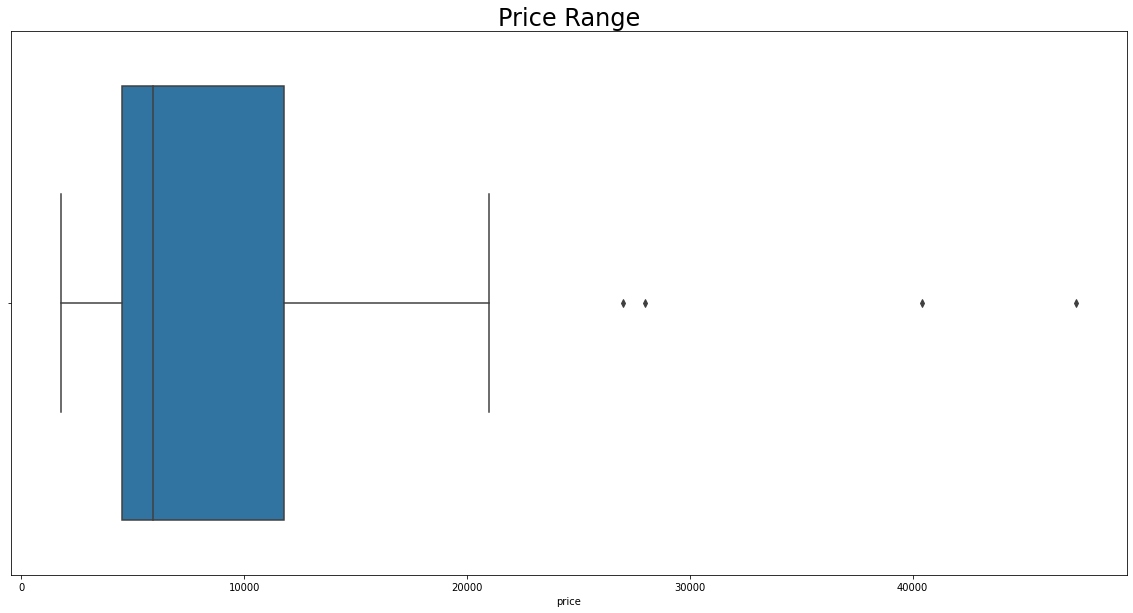

In [105]:
plt.figure(figsize=(20,10))
plt.title('Price Range',fontsize=24)
sns.boxplot(x = df.price);
plt.show()

In [106]:
df.describe()

,front_camera,back_camera,screen_size,RAM,Memory,Battery,price
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,15.613636,45.943182,6.534886,6.204545,103.636364,4860.113636,9024.534091
std,11.569313,30.460209,0.104628,4.978480,55.318136,468.576946,7538.501700
min,5.000000,8.000000,6.400000,2.000000,32.000000,3300.000000,1800.000000
25%,7.250000,13.000000,6.500000,4.000000,64.000000,4500.000000,4537.250000
50%,11.000000,50.000000,6.505000,6.000000,128.000000,5000.000000,5889.500000
75%,23.000000,64.000000,6.592500,8.000000,128.000000,5000.000000,11777.000000
max,50.000000,200.000000,6.900000,48.000000,256.000000,7000.000000,47333.000000


In [107]:
avg_price_by_brand = df.groupby('brand')['price'].mean().to_frame()
avg_price_by_brand

,price
brand,
huawei,8521.250000
oppo,6969.680000
realme,6080.727273
samsung,12944.533333
vivo,9102.857143


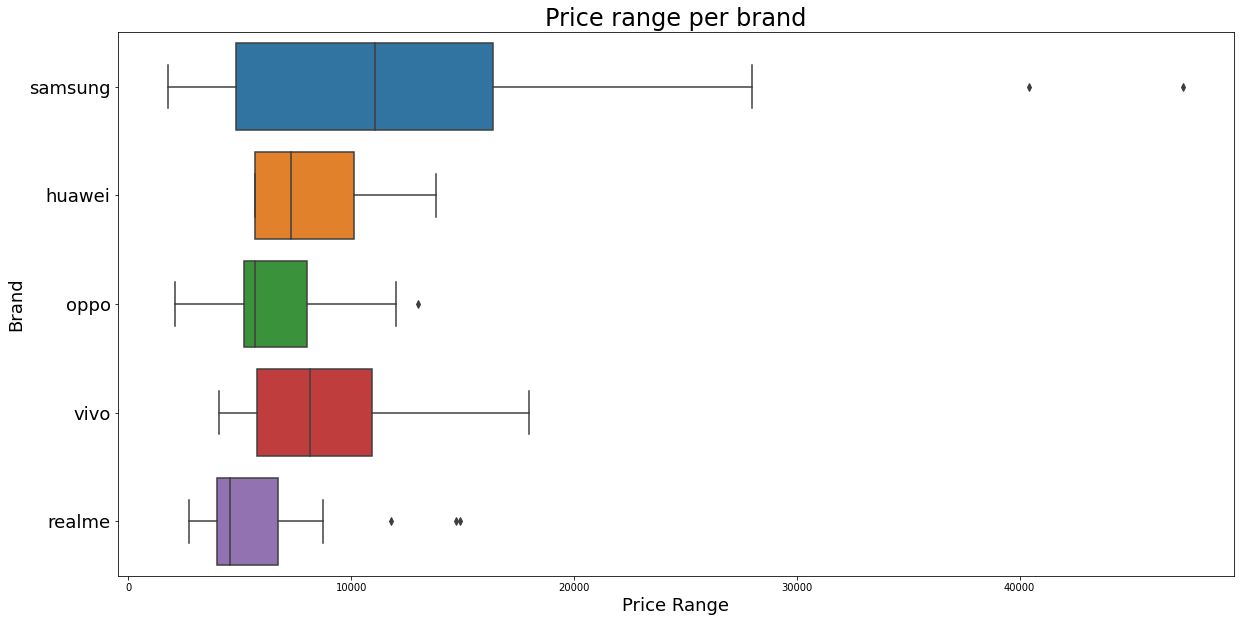

In [108]:
plt.figure(figsize=(20,10))
sns.boxplot(x= 'price', y = 'brand', data = df);
plt.title('Price range per brand', fontsize = 24)
plt.xlabel('Price Range', fontsize = 18)
plt.ylabel('Brand', fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

In [109]:
df.brand.value_counts()

samsung    30
oppo       25
realme     22
vivo        7
huawei      4
Name: brand, dtype: int64

In [113]:
df.to_excel('clean_data.xlsx',index=False)